## Supervised Machine Learning - KNN Classification

In [9]:
# Breast Cancer Data

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# Data Description
cancer_data = load_breast_cancer()
print("cancer_data.keys(): {}" .format(cancer_data.keys()))
print("\nShape of cancer data: {}" .format(cancer_data.data.shape))
print('\nSample counts per class: \n{}' .format(
{n:x for n, x in zip(cancer_data.target_names, np.bincount(cancer_data.target))}))
print("\nFeature names: \n{}" .format(cancer_data.feature_names))

cancer_data.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Shape of cancer data: (569, 30)

Sample counts per class: 
{'malignant': 212, 'benign': 357}

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


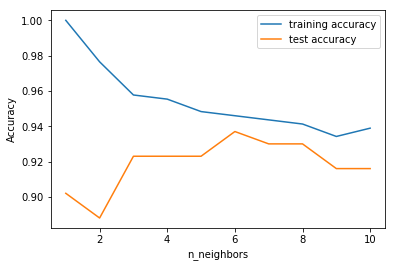

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target, stratify=cancer_data.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Supervised Machine Learning - KNeighborsRegressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target, stratify=cancer_data.target, random_state=66)

# instantiate the model
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [63]:
print("Test predictions: \n{}" .format(reg.predict(X_test)))

Test predictions: 
[ 1.          1.          0.66666667  1.          0.66666667  1.          1.
  1.          0.          0.33333333  0.          1.          0.          1.
  1.          0.33333333  1.          1.          1.          1.          1.
  1.          1.          0.66666667  0.          1.          1.          0.
  1.          0.          0.          0.          1.          0.          0.
  0.66666667  0.          1.          1.          0.          1.          0.
  1.          1.          1.          0.          1.          1.          0.
  1.          1.          0.          0.66666667  1.          1.          1.
  0.          1.          1.          1.          0.          1.          0.
  0.          1.          1.          1.          1.          0.33333333
  0.          0.          0.33333333  1.          0.          1.          0.
  0.66666667  1.          1.          1.          0.33333333  0.          0.
  0.          1.          1.          1.          1.         

In [64]:
print('Test set R^2: 0.83' .format(reg.score(X_test, y_test)))

Test set R^2: 0.83


## Supervised Machine Learning - Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
import mglearn

X,y = mglearn.datasets.load_extended_boston()

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [71]:
print("Training set score: {:.2f}" .format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}" .format(lr.score(X_test, y_test)))

# the discrepency in the performance between training and test set is due to overrfitting 
# one of the commonly used alternatives to standard linear regression is ridge regressionw

Training set score: 0.95
Test set score: 0.61


## Ridge Regression

In [73]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [74]:
# Ridge performance with alpha 

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score: 0.79
Test set score: 0.64
Training set score: 0.93
Test set score: 0.77


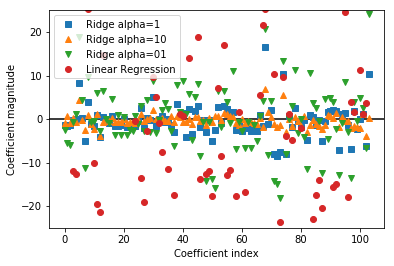

In [84]:
plt.plot(ridge.coef_, 's', label ="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label ="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label ="Ridge alpha=01")

plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

# Lasso Regression

In [86]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [87]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [88]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}" .format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}" .format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


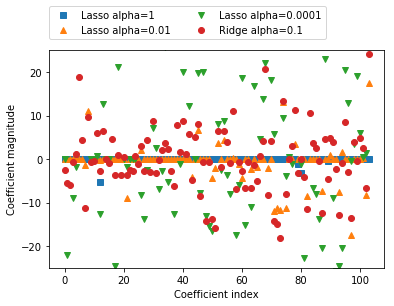

In [89]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [1]:
## Linear Models for classifion

It is very indentical to linear regression, in this case instead of the weighted sim of the features 
we threshold the predicted value at zero.

If the funcation is smaller than zero, we predict the class -1, if it is larger than zero, we predict +1

Most common linear classification algorithms are logistic regression, svm (support vector machines)

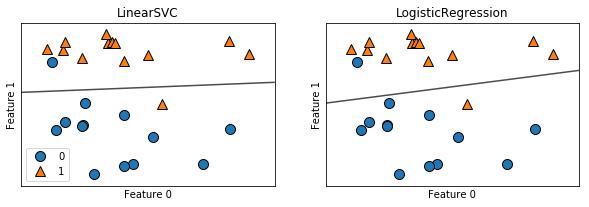

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [33]:
# Logistic Regression on breast cancer data

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data
                                                   ,cancer.target
                                                   ,stratify=cancer.target
                                                   ,random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}" .format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}" .format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [36]:
# The default value of C=1 provides a good performance, 
# but since the training and test performance are very close, it is likely we are underfitting the model.

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}" .format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}" .format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print("Training set score: {:.3f}" .format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}" .format(logreg001.score(X_test, y_test)))



Training set score: 0.972
Test set score: 0.965
Training set score: 0.923
Test set score: 0.937


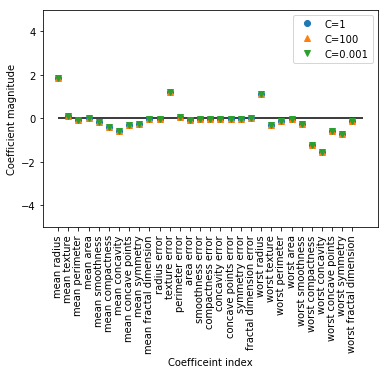

In [48]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficeint index")
plt.ylabel("Coefficient magnitude")
plt.legend()